# RANDOM MATRICES ANALYSIS

## Import zone

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

## Functions definition

In [32]:
def random_herm_spectrum(N, seed, verb = False):
  np.random.seed(seed)
  A = np.random.randn(N, N) + 1j * np.random.randn(N, N)
  A = np.tril(A) + np.tril(A, -1).conj().T  # Make the matrix Hermitian
  eigenvalues, eigenvectors = np.linalg.eigh(A)  # 'eigh' is used for Hermitian matrices
  spectrum = pd.DataFrame({'Eigenvalue' : eigenvalues, 'Eigenvectors' : [vec for vec in eigenvectors]})
  
  if verb==True:
    print(f'Random Hermitian Matrix:\n {A} \n')
    print(f'Eigenvalues with corresponding eigenvectors:\n {spectrum} \n')
  
  return eigenvalues, eigenvectors

def random_diag_spectrum(N, seed, verb = False):
  np.random.seed(seed)
  diag = np.random.randn(N)
  A = np.diag(diag)
  
  eigenvalues, eigenvectors = np.linalg.eig(A)
  sorted_indices = np.argsort(eigenvalues)
  eigenvalues = eigenvalues[sorted_indices]
  eigenvectors = eigenvectors[:, sorted_indices]

  spectrum = pd.DataFrame({'Eigenvalue' : eigenvalues, 'Eigenvectors' : [vec for vec in eigenvectors]})
  
  if verb:
    print(f'Random Diagonal Matrix (real):\n {A} \n')
    print(f'Eigenvalues with corresponding eigenvectors:\n {spectrum} \n')
  
  return eigenvalues, eigenvectors

def compute_norm_spacing(N, seed, mode = 'herm', trim = False):
  if mode == 'herm':
    eigval, _ = random_herm_spectrum(N, seed)
  elif mode == 'diag':
    eigval, _ = random_diag_spectrum(N, seed)
  else:
    None
  
  if trim:
    eigval = eigval[1:]  # Discard the first eigenvalue
  
  differences = np.diff(eigval)
  average = np.mean(differences) 
  spacings = differences / average
  return spacings

def compute_spacing_distr(N, seed, N_matrices, mode, trim = False):
  spacing_distr = []
  
  for i in range(N_matrices):
    seed = seed + N * i
    spacings = compute_norm_spacing(N, seed, mode=mode, trim=trim)
    spacing_distr.extend(spacings)
    
  return spacing_distr

## Exercise 2

In [14]:
N = 5
seed = 12345
verb = True
trim = True

eigval, eigvec = random_herm_spectrum(N, seed, verb)

normalized_spacings = compute_norm_spacing(N, seed, mode='herm')
print(f'Normalized spacings between eigenvalues:\n {normalized_spacings}\n')
normalized_spacings = compute_norm_spacing(N, seed, mode='herm', trim=trim)
print(f'Normalized spacings between eigenvalues (Discarding the first):\n {normalized_spacings}')

Random Hermitian Matrix:
 [[-0.20470766+0.12412128j  1.39340583+0.71354399j  1.00718936-0.56014529j
   0.88642934+2.35941881j -0.53974145-0.28634975j]
 [ 1.39340583-0.71354399j  0.09290788-0.83115354j -1.29622111+1.26593449j
  -2.00163731+0.19954296j  0.47698501-0.37798411j]
 [ 1.00718936+0.56014529j -1.29622111-1.26593449j  0.27499163+0.11982712j
  -0.37184254+1.54199553j  3.24894392+0.75388653j]
 [ 0.88642934-2.35941881j -2.00163731-0.19954296j -0.37184254-1.54199553j
   1.66902531-0.97073591j -1.02122752-0.33128565j]
 [-0.53974145+0.28634975j  0.47698501+0.37798411j  3.24894392-0.75388653j
  -1.02122752+0.33128565j -0.5770873 +1.34974221j]] 

Eigenvalues with corresponding eigenvectors:
    Eigenvalue                                       Eigenvectors
0   -4.892519  [(-0.41683347252250275+0j), (0.473023464163162...
1   -2.787285  [(0.37375414534194107-0.25898232889160844j), (...
2    0.738377  [(0.5489508534340726+0.1095490447787682j), (0....
3    2.795161  [(0.10041311446037304-0.1

## Exercise 3

In [ ]:
N = 5
seed = 12345
verb = True
trim = True

eigval, eigvec = random_diag_spectrum(N, seed, verb)

normalized_spacings = compute_norm_spacing(N, seed, mode='diag')
print(f'Normalized spacings between eigenvalues:\n {normalized_spacings}\n')

normalized_spacings = compute_norm_spacing(N, seed, mode='diag', trim=trim)
print(f'Normalized spacings between eigenvalues (Discarding the first):\n {normalized_spacings}')

Random Diagonal Matrix (real):
 [[-0.20470766  0.          0.          0.          0.        ]
 [ 0.          0.47894334  0.          0.          0.        ]
 [ 0.          0.         -0.51943872  0.          0.        ]
 [ 0.          0.          0.         -0.5557303   0.        ]
 [ 0.          0.          0.          0.          1.96578057]] 

Eigenvalues with corresponding eigenvectors:
    Eigenvalue               Eigenvectors
0   -0.555730  [0.0, 0.0, 1.0, 0.0, 0.0]
1   -0.519439  [0.0, 0.0, 0.0, 1.0, 0.0]
2   -0.204708  [0.0, 1.0, 0.0, 0.0, 0.0]
3    0.478943  [1.0, 0.0, 0.0, 0.0, 0.0]
4    1.965781  [0.0, 0.0, 0.0, 0.0, 1.0] 

Normalized spacings between eigenvalues:
 [0.05757118 0.49927376 1.08451009 2.35864497]

Normalized spacings between eigenvalues (Discarding the first):
 [0.37992348 0.82526037 1.79481615]


In [34]:
N_matrices = 50
N = 1024
seed = 12345

spac_distr_herm = compute_spacing_distr(N, seed, N_matrices, mode='herm')
spac_distr_diag = compute_spacing_distr(N, seed, N_matrices, mode='diag')

RMS Error: 0.0078


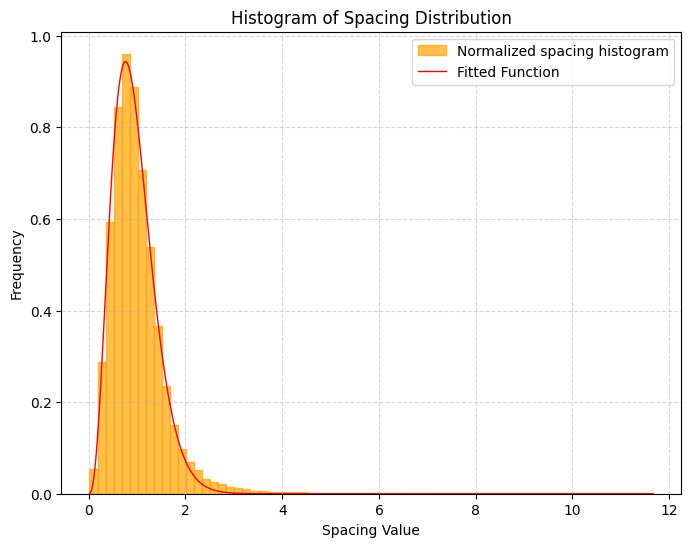

In [62]:
# Define the fitting function
def fitting_function(s, a, alpha, b, beta):
  return a * (s**alpha) * np.exp(b * (s**beta))

# Histogram data preparation
counts, bin_edges = np.histogram(spac_distr_herm, bins=100, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
hist_density = counts / (np.sum(counts) * np.diff(bin_edges)[0])  # Normalize counts

# Curve fitting
initial_guess = [1, 1, -1, 1]
params, covariance = curve_fit(fitting_function, bin_centers, hist_density, p0=initial_guess)
a, alpha, b, beta = params

# RMS error computation
expected = fitting_function(bin_centers, a, alpha, b, beta)
rms_error = np.sqrt(np.mean((hist_density - expected) ** 2))
print(f"RMS Error: {rms_error:.4f}")

# Plotting
spacings_range = (np.min(spac_distr_herm), np.max(spac_distr_herm))
s_vals = np.linspace(np.min(spac_distr_herm), np.max(spac_distr_herm), 1000)

plt.figure(figsize=(8, 6))
plt.hist(spac_distr_herm, bins=70, range=spacings_range, color='orange', edgecolor='orange', alpha = 0.7, density=True, label='Normalized spacing histogram')
plt.plot(s_vals, fitting_function(s_vals, a, alpha, b, beta), 'r-', label='Fitted Function', linewidth=1)
plt.title('Histogram of Spacing Distribution')
plt.xlabel('Spacing Value')
plt.ylabel('Frequency')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

In [41]:
spac_distr_diag = np.array(spac_distr_diag)
len(spac_distr_diag[spac_distr_diag>13])
len(spac_distr_diag)

51150

RMS Error: 0.0039


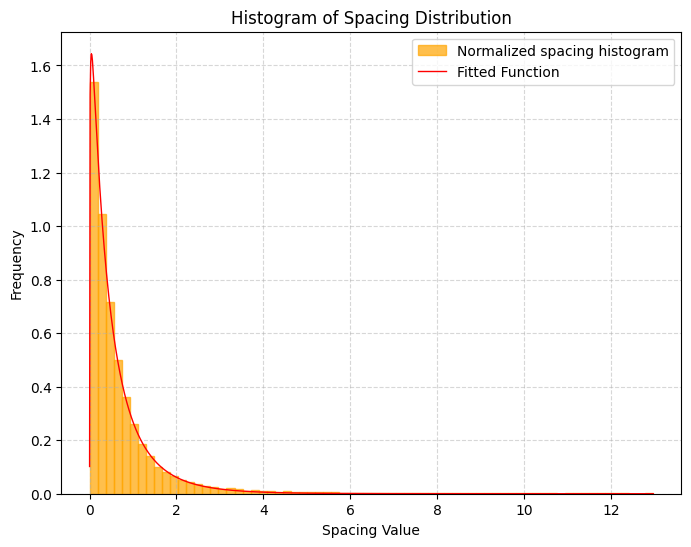

In [76]:
# Histogram data preparation
counts, bin_edges = np.histogram(spac_distr_diag, bins=100, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
hist_density = counts / (np.sum(counts) * np.diff(bin_edges)[0])  # Normalize counts

# Curve fitting
initial_guess = [0.6, -0.2, -2.4, 0.9]
params, covariance = curve_fit(fitting_function, bin_centers, hist_density, p0=initial_guess)
a, alpha, b, beta = params

# RMS error computation
expected = fitting_function(bin_centers, a, alpha, b, beta)
rms_error = np.sqrt(np.mean((hist_density - expected) ** 2))
print(f"RMS Error: {rms_error:.4f}")

# Plotting
spacings_range = (np.min(spac_distr_diag), np.max(spac_distr_diag))
s_vals = np.linspace(np.min(spac_distr_diag), np.max(spac_distr_diag), 1000)

plt.figure(figsize=(8, 6))
plt.hist(spac_distr_diag, bins=70, range=spacings_range, color='orange', edgecolor='orange', alpha = 0.7, density=True, label='Normalized spacing histogram')
plt.plot(s_vals, fitting_function(s_vals, a, alpha, b, beta), 'r-', label='Fitted Function', linewidth=1)
plt.title('Histogram of Spacing Distribution')
plt.xlabel('Spacing Value')
plt.ylabel('Frequency')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()